In [1]:
import numpy as np
import trimesh
from scipy.stats import special_ortho_group
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mesh = trimesh.load_mesh('surf14.ply')

In [3]:
# number of meshes to open
m = 112

## is the current mesh closed?

In [4]:
mesh.is_watertight

True

In [5]:
# preview mesh in a pyglet window from a terminal, or inline in a notebook
mesh.show()

## Check to see if a point is inside or outside a mesh? 

In [6]:
check_in_or_out = trimesh.proximity.ProximityQuery(mesh)

In [7]:
check_in_or_out.signed_distance([[0,0,0]])

array([-3.58278202])

In [8]:
check_in_or_out.signed_distance([[1000,1000,1000]])

array([-1632.5506959])

## Extract Vertices

In [9]:
V = np.array(mesh.vertices)

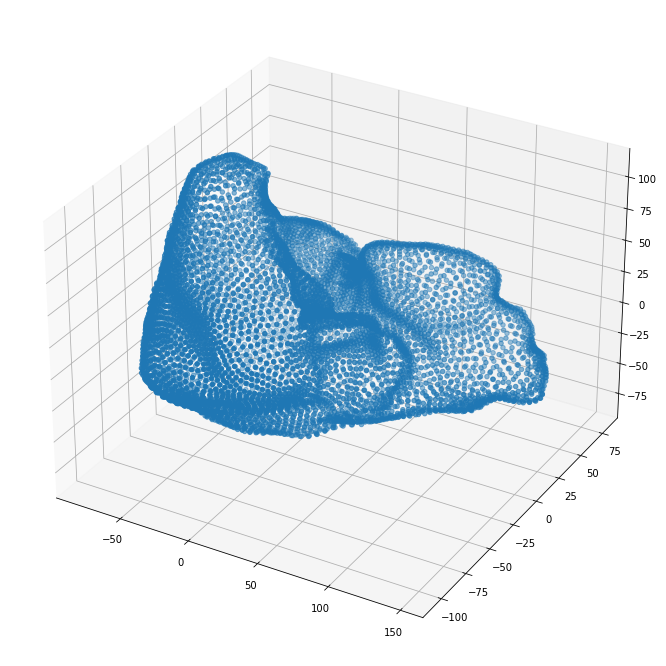

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.scatter3D(V[:,0], V[:,1], V[:,2])
plt.show()

## Rotate points

In [11]:
R = special_ortho_group.rvs(3)

In [12]:
newV = V @ R

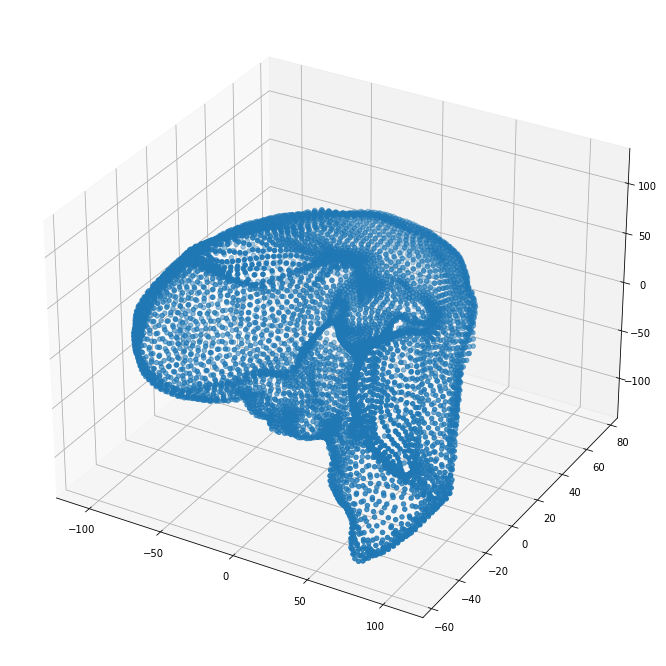

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.scatter3D(newV[:,0], newV[:,1], newV[:,2])
plt.show()

## Perform Generalized Procrustes to Generate Mean Shape

In [14]:
point_list = np.zeros(V.shape)

In [15]:
figures = np.zeros((m, len(point_list), 3))

for k in range(m):
    stl_mesh = trimesh.load_mesh('surf' + str(1 + k) + '.ply')
    figures[k, :, :] = np.array(stl_mesh.vertices)

In [16]:
r = np.random.randint(112)
M = np.zeros(figures[r,:,:].shape)

for k in range(m):
    if k != r: 
        T, V_transformed, d = trimesh.registration.procrustes(figures[k,:,:], figures[r,:,:])
        M += V_transformed
    
M /= ( m - 1 )

for t in range(2):
    M_new = np.zeros(M.shape)
    total_d = []
    for k in range(m):
        T, V_transformed, d = trimesh.registration.procrustes(figures[k,:,:], M)
        total_d.append(d)
        M_new += V_transformed
    M = M_new
    M /= m
    
    if max(total_d) < 0.1:
        print("Converged!")
        break

In [17]:
M.shape

(6977, 3)

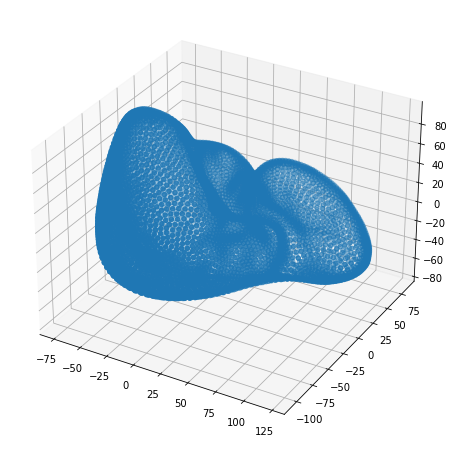

In [18]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(M[:,0], M[:,1], M[:,2])
plt.show()